In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing Part

In [3]:
df.shape

(907, 27)

Dataset has 27 columns and 907 rows



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

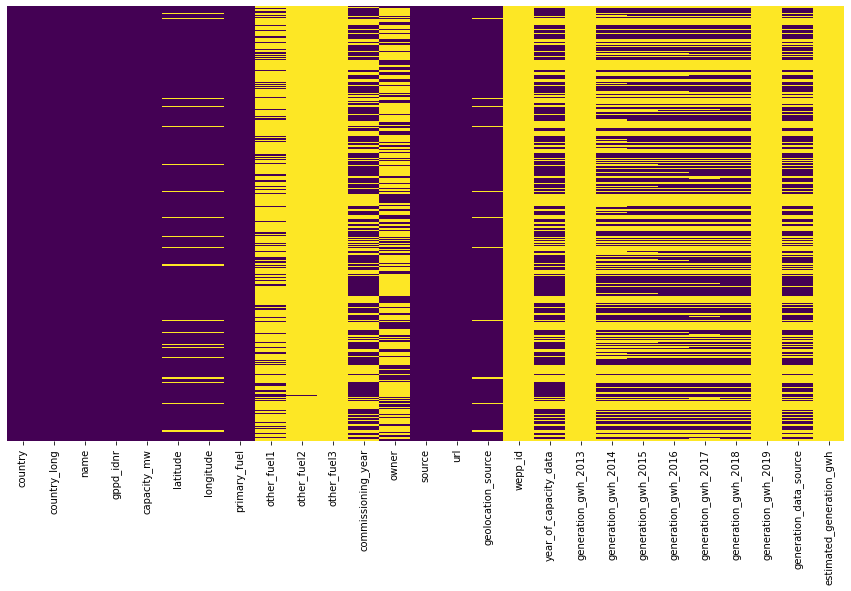

In [6]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The below mentioned columns are almost filled with null values:-

other fuel2, other fuel3,wepp_id generation_gwh_2013 generation_gwh_2019 and estimated_generation_gwhh

we can drop it

In [7]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

<AxesSubplot:>

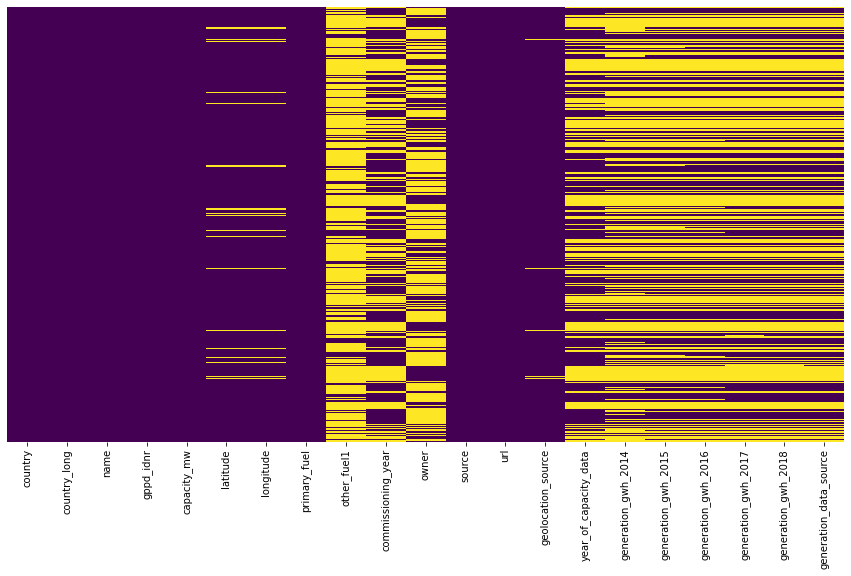

In [8]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.shape

(907, 21)

In [10]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [11]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

country and country_long both the columns has no value , so we can drop this column



In [12]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [13]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# EDA

In [14]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

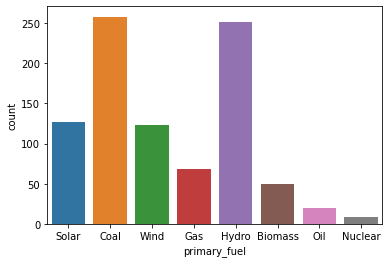

In [15]:
sns.countplot(x='primary_fuel',data=df)

(i) Maximum number of power plant is Coal -259

(ii) Hydro plant -250, Solar- 127, Wind- 123, Gas- 69, Biomass= 50, Oil - 21 , Nuclear - 21

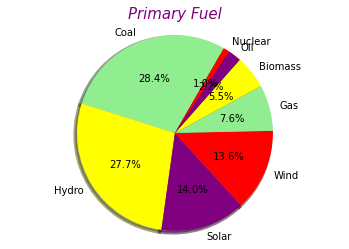

In [16]:
plt.pie(x=df['primary_fuel'].value_counts(),labels=df['primary_fuel'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Primary Fuel',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()


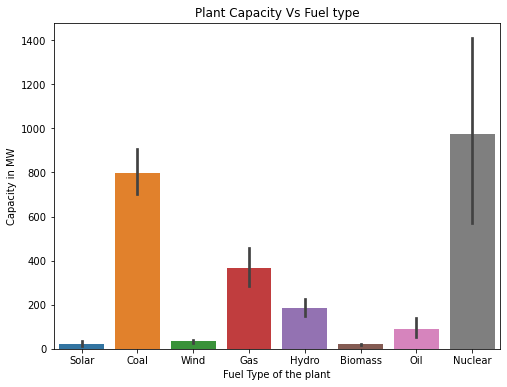

In [17]:
plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

(i) Solar power plant has capacity of with in 150 MW

(ii) Coal power plant has range of 1-4000+ MW

(iii) Hydro power plant has range of 1500 MW

(iv) Gas power plant has range of 1500 MW

(v) Nuclear power has the capacity upto 2000MW

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

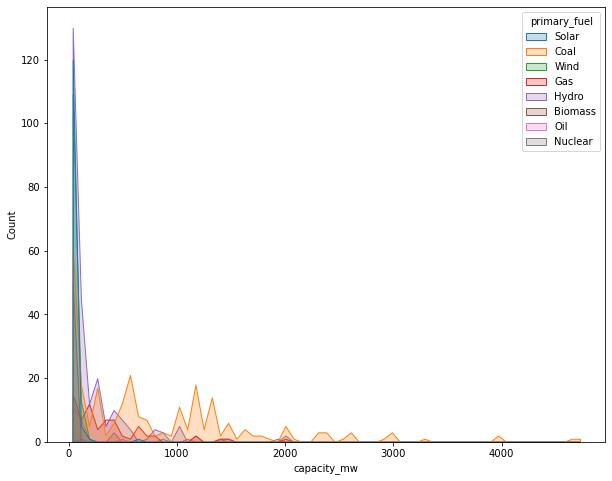

In [18]:
plt.figure(figsize=[10,8])
sns.histplot(x='capacity_mw',hue='primary_fuel',element='poly',data=df)

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

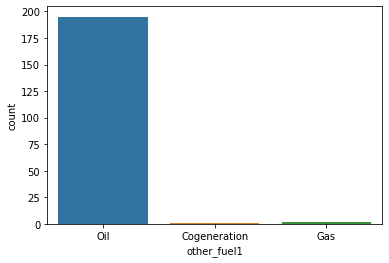

In [19]:
sns.countplot(x='other_fuel1',data=df)

In other fuel type power plant maximum are Oil based, few are Cogeneartion and Gas



<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

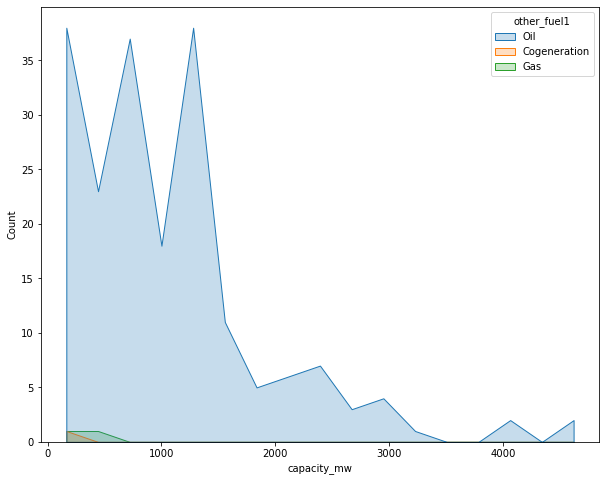

In [20]:
plt.figure(figsize=[10,8])
sns.histplot(x='capacity_mw',hue='other_fuel1',element='poly',data=df)

(i) oil powered plant has highest capacity around 4700 MW



[Text(0, 0, 'Solar Paces'),
 Text(1, 0, 'Ultratech Cement ltd'),
 Text(2, 0, 'AES'),
 Text(3, 0, 'Hindustan Pvt lt'),
 Text(4, 0, 'Dr Ssk ltd'),
 Text(5, 0, 'Ashok Ssk ltd'),
 Text(6, 0, 'Shree Sugars ltd'),
 Text(7, 0, 'Ener-t International Ltd.'),
 Text(8, 0, 'Nav Bharat Buildcon Private Limited'),
 Text(9, 0, 'MEIL Green Power Limited'),
 Text(10, 0, 'Madras Cement Limited'),
 Text(11, 0, 'DDE Renewable Energy Private Limited (DREPL)'),
 Text(12, 0, 'Electromech Maritech Private Limited'),
 Text(13, 0, 'Finehope Allied Engineering Private Limited'),
 Text(14, 0, 'Khaya Solar Projects Private Limited'),
 Text(15, 0, 'Newton Solar Private Limited'),
 Text(16, 0, 'Saidham Overseas Private Limited'),
 Text(17, 0, 'Vasavi Solar Power Private Limited'),
 Text(18, 0, 'Indian Power ltd'),
 Text(19, 0, 'Ballarpur Industries ltd'),
 Text(20, 0, 'Jk Cement ltd'),
 Text(21, 0, 'India Ltd icl)'),
 Text(22, 0, 'Bharat Petroleum Corporation Limited'),
 Text(23, 0, 'Bhilwara Energy Limited'),
 Text

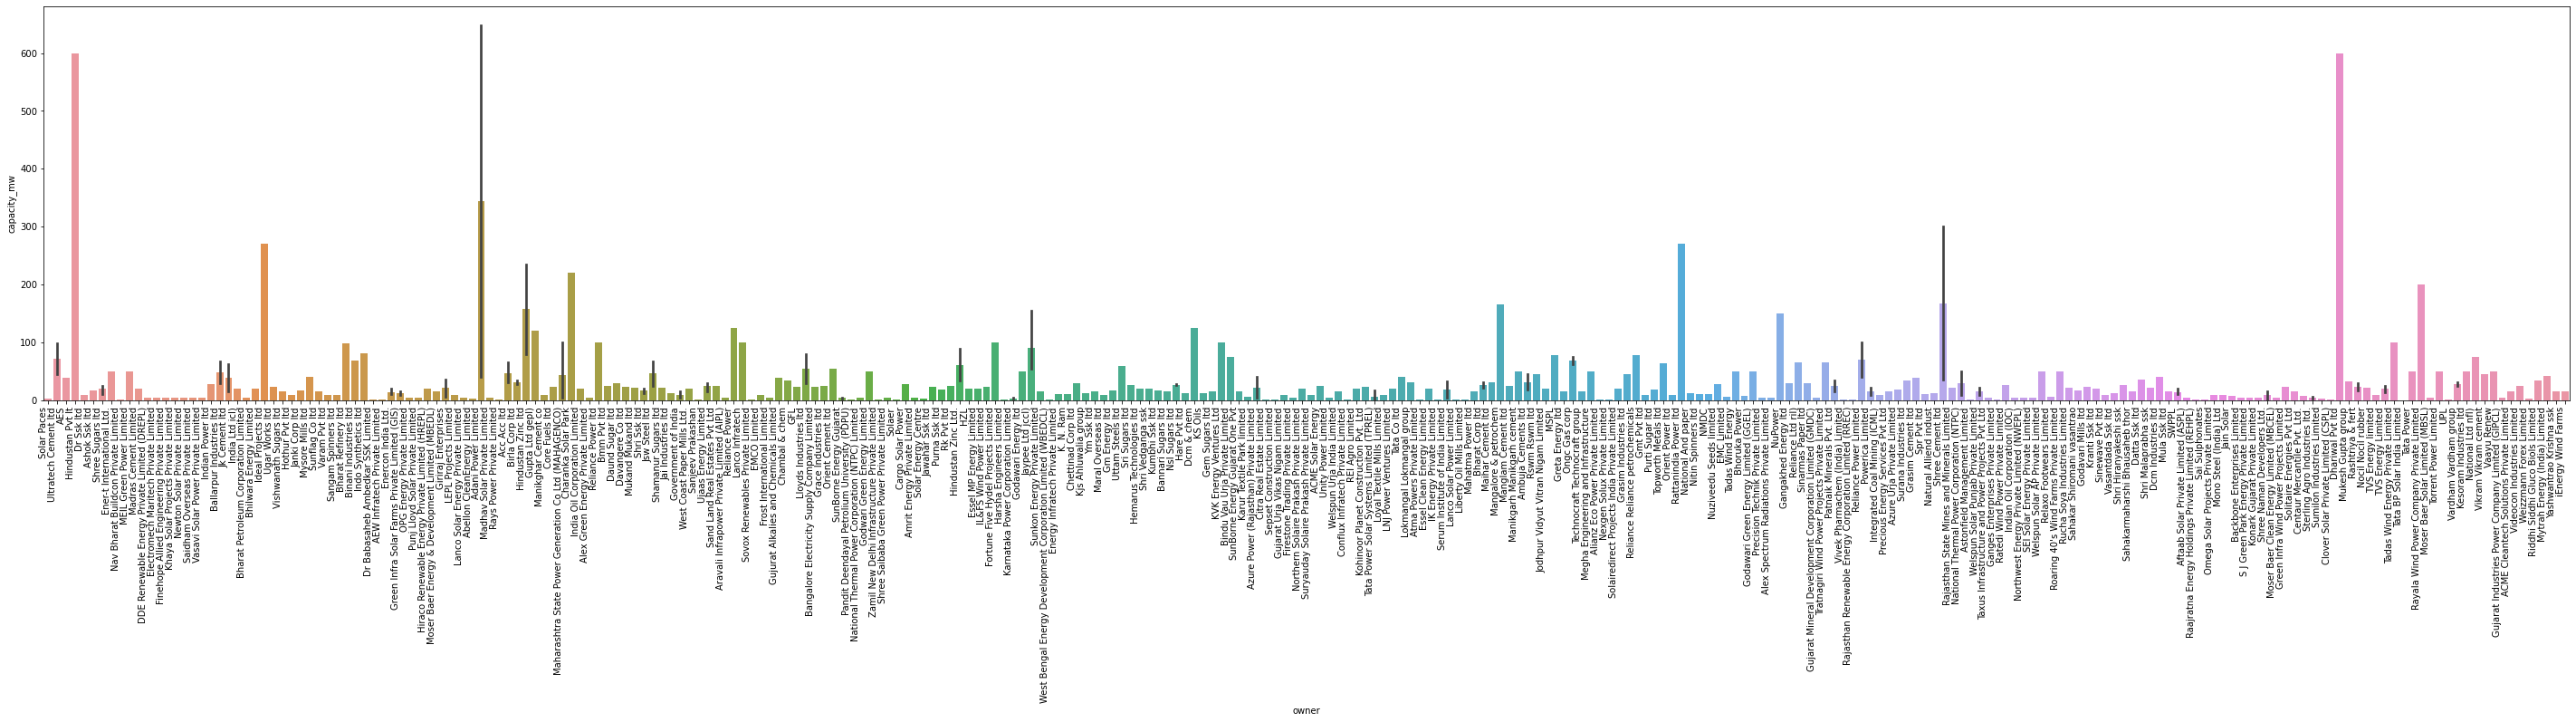

In [21]:
plt.figure(figsize=[50,8])

chart=sns.barplot(x='owner',y='capacity_mw',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')

Top 5 owner to product power are as follows 

(i) Adani Power Limited

(ii) Hindustan Pvt. Ltd.

(iii) Dhariwal Pvt. Ltd.

(iv) Ideal Project Ltd.

(v) RattanIndia Ovt Ltd.


In [22]:
#extracting the average capacity in MW per year
df2=df.groupby('commissioning_year', as_index=False)['capacity_mw'].mean()

extracted the average capacity based on year saved in dataframe



In [24]:
df2.head()

,commissioning_year,capacity_mw
0,1927.0,42.0
1,1937.0,5.0
2,1939.0,17.2
3,1943.0,59.2
4,1946.0,32.0


[Text(0, 0, '1927.0'),
 Text(1, 0, '1937.0'),
 Text(2, 0, '1939.0'),
 Text(3, 0, '1943.0'),
 Text(4, 0, '1946.0'),
 Text(5, 0, '1949.0'),
 Text(6, 0, '1952.0'),
 Text(7, 0, '1953.0'),
 Text(8, 0, '1954.0'),
 Text(9, 0, '1955.0'),
 Text(10, 0, '1956.0'),
 Text(11, 0, '1957.0'),
 Text(12, 0, '1958.0'),
 Text(13, 0, '1959.0'),
 Text(14, 0, '1960.0'),
 Text(15, 0, '1961.0'),
 Text(16, 0, '1962.0'),
 Text(17, 0, '1963.0'),
 Text(18, 0, '1964.0'),
 Text(19, 0, '1965.0'),
 Text(20, 0, '1966.0'),
 Text(21, 0, '1967.0'),
 Text(22, 0, '1968.0'),
 Text(23, 0, '1969.0'),
 Text(24, 0, '1970.0'),
 Text(25, 0, '1971.0'),
 Text(26, 0, '1972.0'),
 Text(27, 0, '1973.0'),
 Text(28, 0, '1974.0'),
 Text(29, 0, '1975.0'),
 Text(30, 0, '1976.0'),
 Text(31, 0, '1977.0'),
 Text(32, 0, '1978.0'),
 Text(33, 0, '1979.0'),
 Text(34, 0, '1980.0'),
 Text(35, 0, '1981.0'),
 Text(36, 0, '1982.0'),
 Text(37, 0, '1983.0'),
 Text(38, 0, '1984.0'),
 Text(39, 0, '1985.0'),
 Text(40, 0, '1986.0'),
 Text(41, 0, '1987.0'),
 T

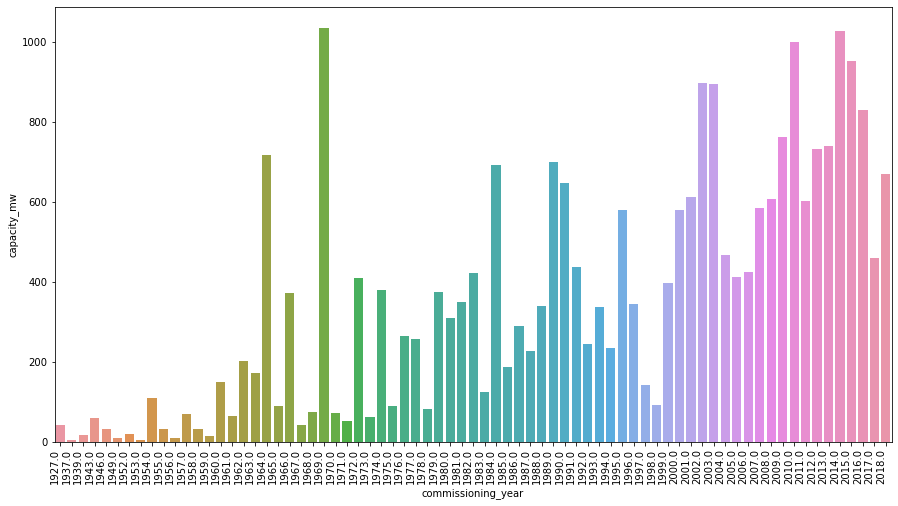

In [25]:
plt.figure(figsize=[15,8])

chart=sns.barplot(x='commissioning_year',y='capacity_mw',data=df2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')

(i) Newer power plant has increased the capacity

(ii) From 2015 the average capacity has declined

(iii) In 1969 the average capacity was at peak , more than 1000 MW

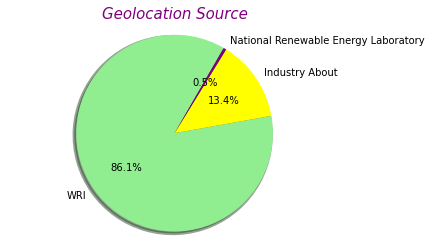

In [26]:
plt.pie(x=df['geolocation_source'].value_counts(),labels=df['geolocation_source'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Geolocation Source',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

86% of power plant belongs to World Rescource Institution



<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

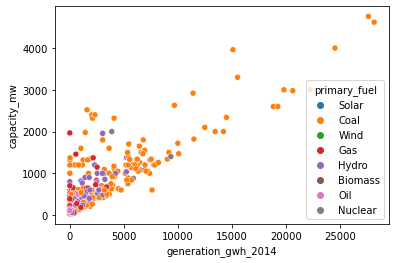

In [27]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2014

(ii) Mostly is was coal power plant

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

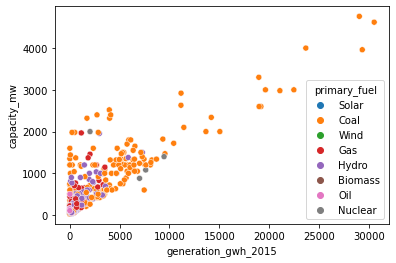

In [28]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2015

(ii) Mostly is was coal power plant

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

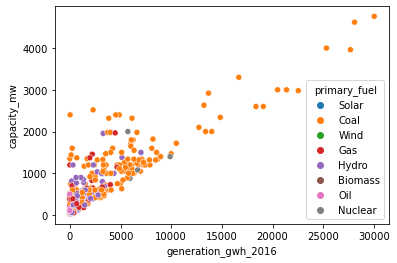

In [33]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

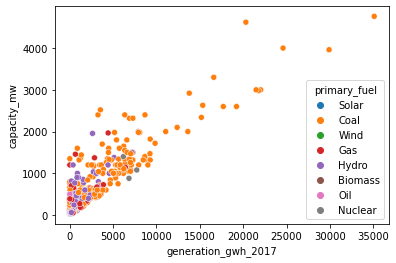

In [30]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2017

(ii) Mostly is was coal power plant

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

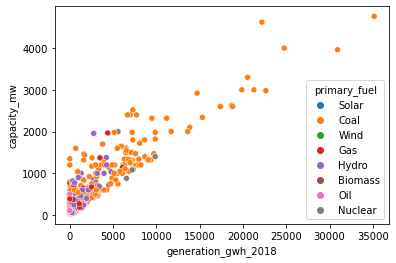

In [34]:
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',hue='primary_fuel',data=df)

(i) There was nill contribution from solar power plant in 2018

(ii) Mostly is was coal power plant

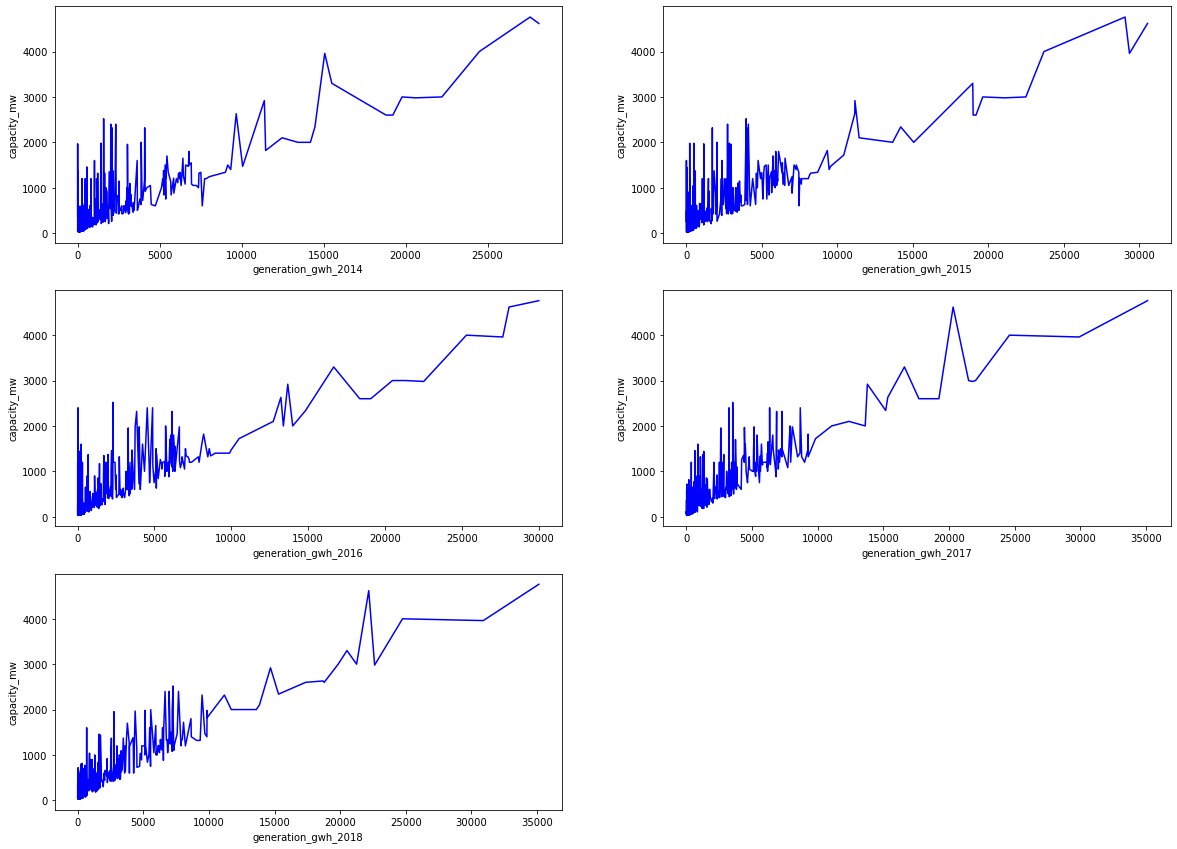

In [37]:
plt.figure(figsize=(20,20))
plotnum=1
for i in df.columns[13:18]:
    plt.subplot(4,2,plotnum)
    sns.lineplot(x=i,y='capacity_mw',data=df,color='b')
    plotnum+=1
    
    

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                861 non-null    float64
 4   longitude               861 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   other_fuel1             198 non-null    object 
 7   commissioning_year      527 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      888 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_gwh_2014     398 non-null    float64
 14  generation_gwh_2015     422 non-null    fl

In [39]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [40]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [41]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [42]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

More than 50% power plant have the url is www.cea.nic.in



<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

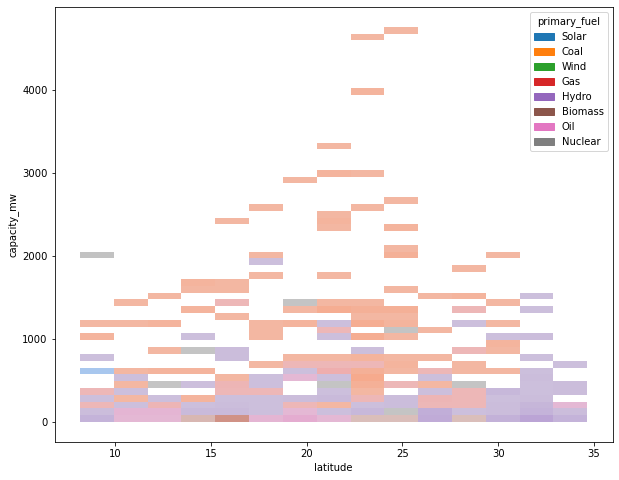

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(x='latitude',y='capacity_mw',hue='primary_fuel',data=df)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

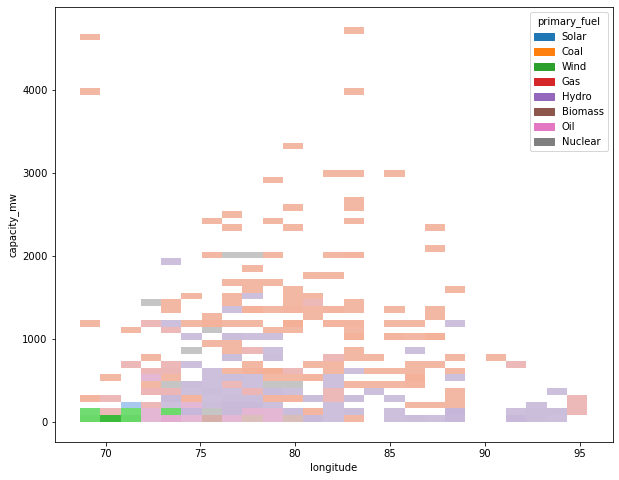

In [44]:
plt.figure(figsize=(10,8))
sns.histplot(x='longitude',y='capacity_mw',hue='primary_fuel',data=df)

The power plant with highest capacity is within latitude 15- 30 and longitude 75 -90



<AxesSubplot:>

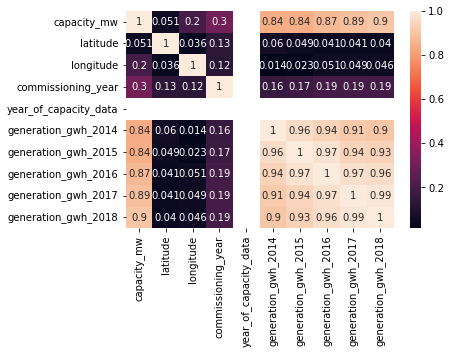

In [45]:
sns.heatmap(df.corr(),annot=True)


In [46]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Statistical View



# Data Preprocessing Part II


In [47]:
# filling null values of categorical column using simple imputer
from sklearn.impute import SimpleImputer

In [48]:
simp=SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0)

In [49]:
simp.fit(df[['geolocation_source']])
df['geolocation_source']=simp.transform(df[['geolocation_source']])

In [50]:
df['geolocation_source'].isnull().sum()

0

FIlled the null value of geolocation_source using most frequent strategy



In [51]:
from sklearn.impute import KNNImputer 

In [52]:
kimp=KNNImputer(n_neighbors=2)

In [53]:
df[['latitude','longitude']]=kimp.fit_transform(df[['latitude','longitude']])


In [54]:
df[['latitude','longitude']].isnull().sum()


latitude     0
longitude    0
dtype: int64

<AxesSubplot:>

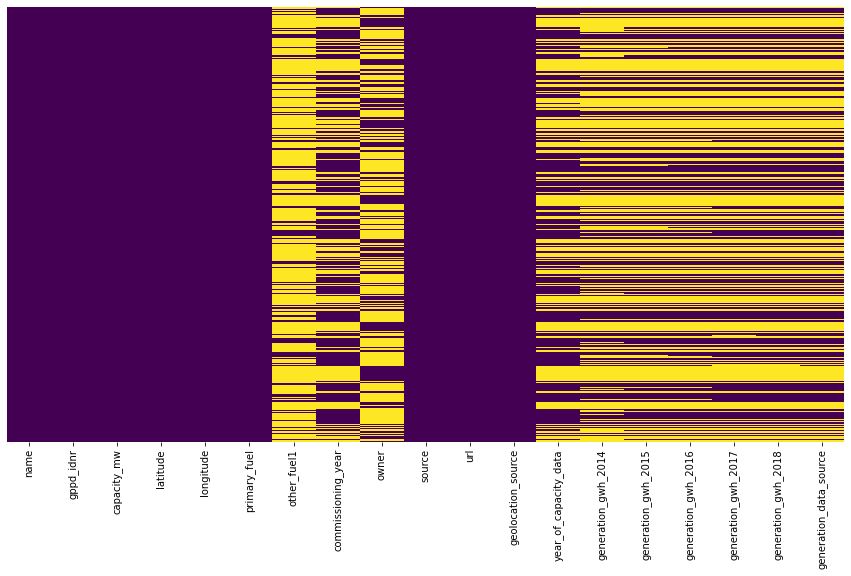

In [56]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

owner column with 623 number of null values will not play in predicting our target value so we will dropit



In [58]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

year of capacity data contains 388 null values and rest all 2018, so its also not significant feature , we will drop it



In [59]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Other fuel 1 has 709 null values out of 908, filling the null value may mislead the prediction so we will drop this column also



In [60]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

Generation data source has single categorical type value in 449 rows rest all are null, so its unimportant for prediction traget. We can dropit.



In [61]:
df.drop(['owner','year_of_capacity_data','other_fuel1','generation_data_source'],axis=1,inplace=True)

<AxesSubplot:>

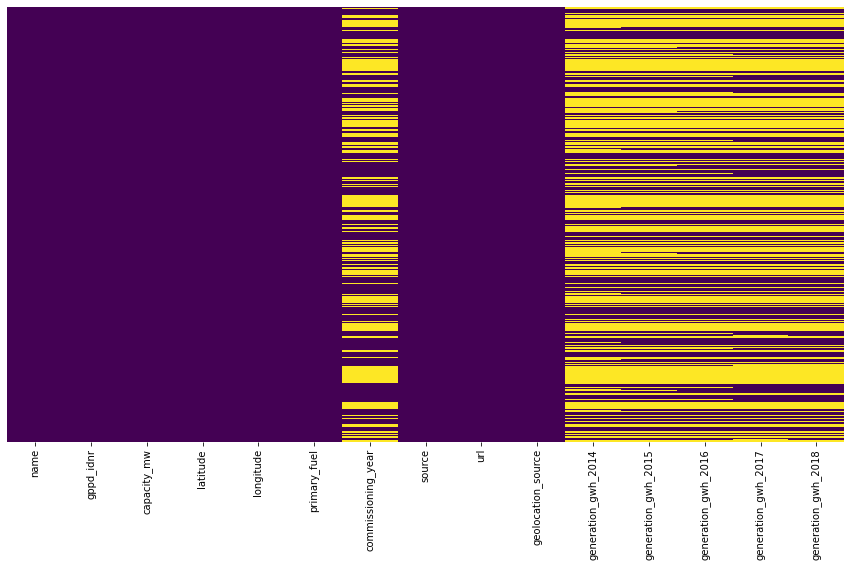

In [62]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
# filling up the null value remainig categorical columns
cols=['commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
simp=SimpleImputer(missing_values=np.nan,strategy='median',verbose=0)
for i in cols:
    simp.fit(df[[i]])
    df[i]=simp.transform(df[[i]])

Filled up the null values with median strategy



<AxesSubplot:>

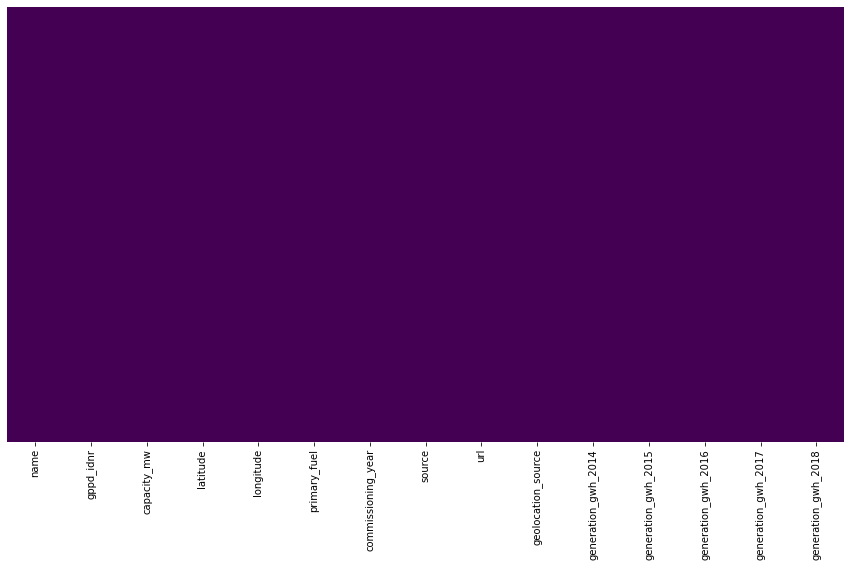

In [64]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we have removed all the null values of the dataset



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
 11  age                  907 non-null    int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 85.2+ KB


In [66]:
# converting into int
df['commissioning_year']=df['commissioning_year'].astype('int64')

In [67]:
df['age']=df['commissioning_year'].apply(lambda x: 2021-x)

In [68]:
df.drop(['name','gppd_idnr','url','commissioning_year'],axis=1,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
 11  age                  907 non-null    int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 85.2+ KB


# Encoding of Categorical Data


In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[['primary_fuel','geolocation_source','source']]=df[['primary_fuel','geolocation_source','source']].apply(le.fit_transform)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   source               907 non-null    int32  
 5   geolocation_source   907 non-null    int32  
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
 11  age                  907 non-null    int64  
dtypes: float64(8), int32(3), int64(1)
memory usage: 74.5 KB


Removing the Outliers


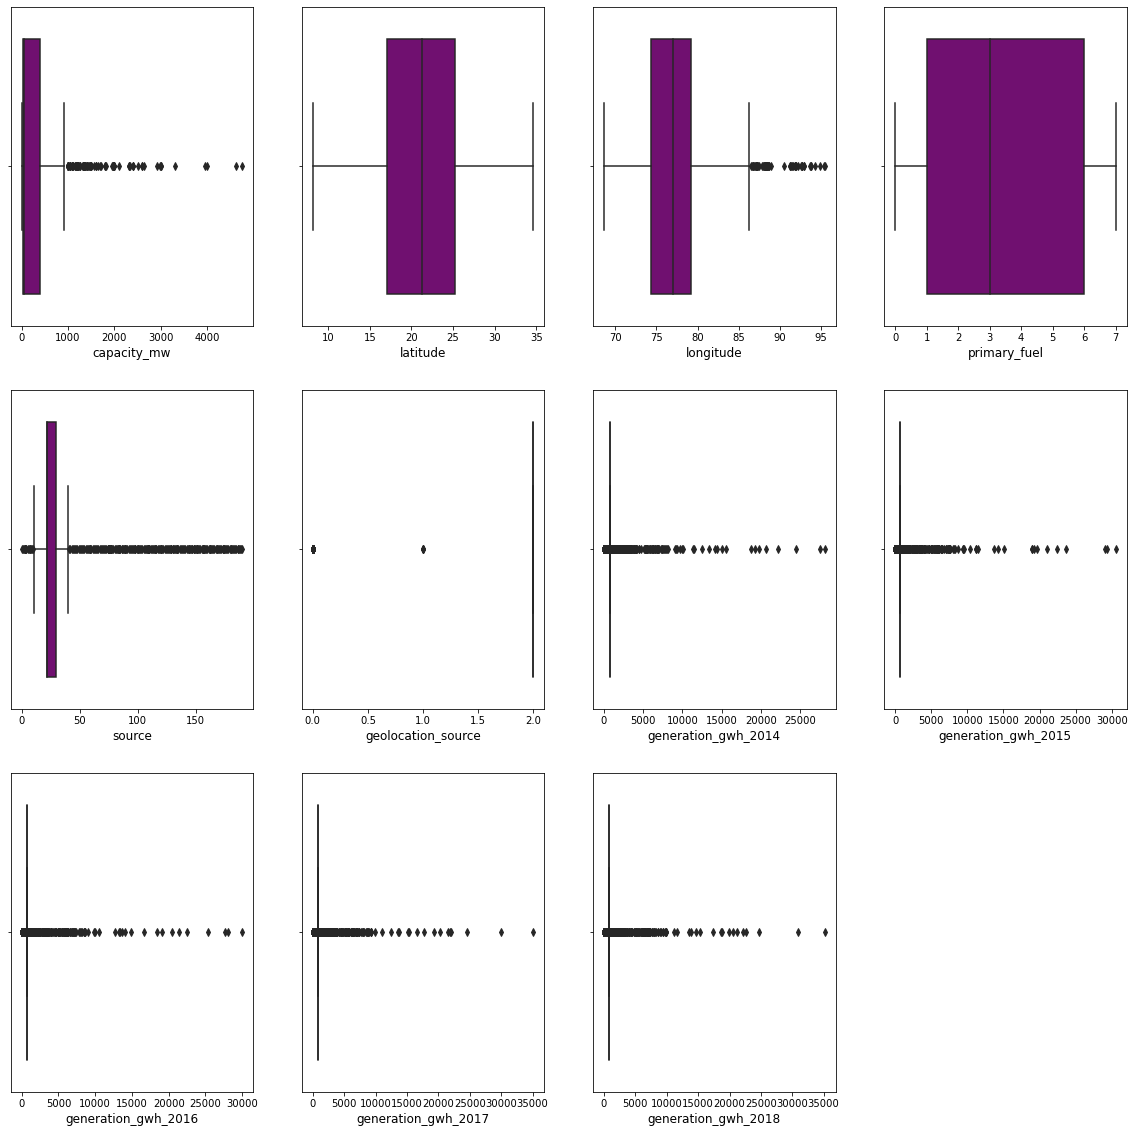

In [77]:
plt.figure(figsize=(20,27))
plotnum=1
for col in df.columns:
    if plotnum<=11:
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

In [81]:
# Features having outliers
features = df[['longitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [82]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [83]:
df.shape

(907, 12)

In [84]:
df=df[(z<3).all(axis=1)]

In [85]:
df.shape

(871, 12)

In [86]:
loss=(907-871)*100/907
loss

3.9691289966923926

4% Data Loss is acceptable



# Correlation


<AxesSubplot:>

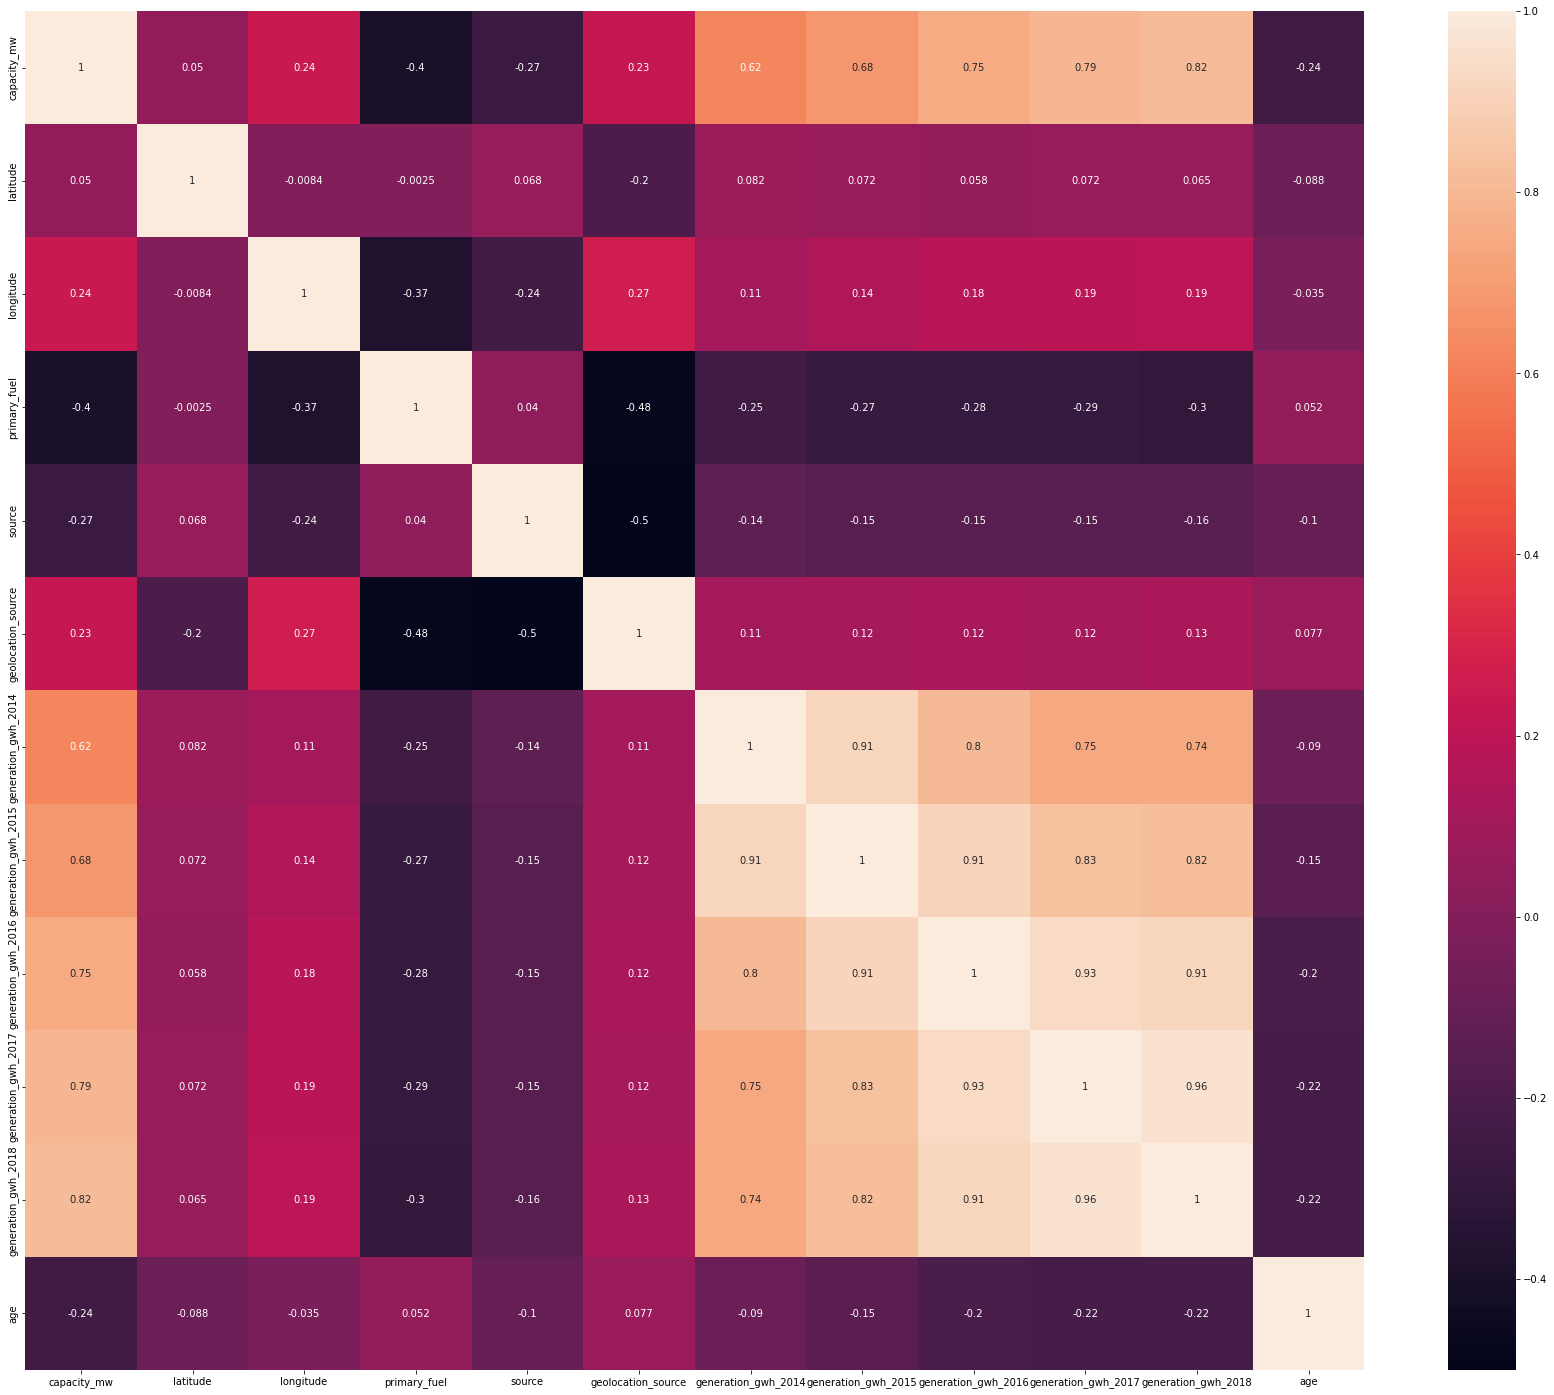

In [87]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,color='blue')

The label capacity_mw is highly positively correlated with the features ,generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014.

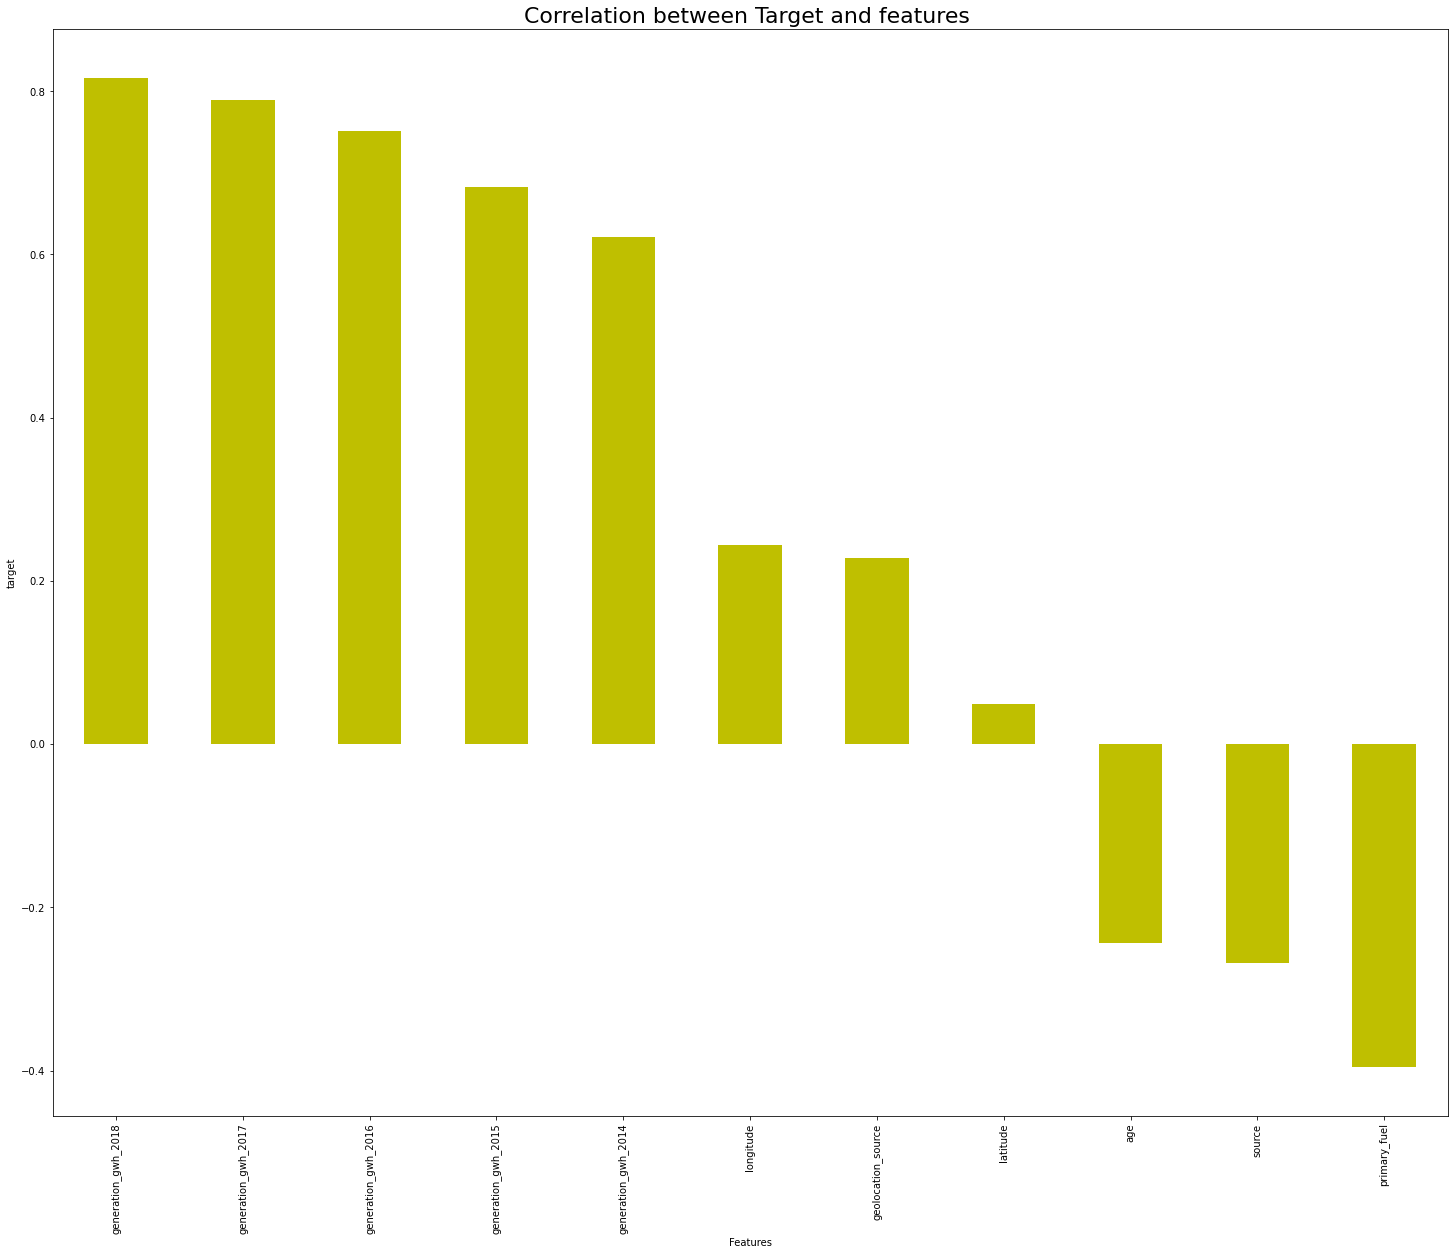

In [88]:
# generationg corraltion bar graph
plt.figure(figsize=(25,20))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='y')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=22)
plt.show()

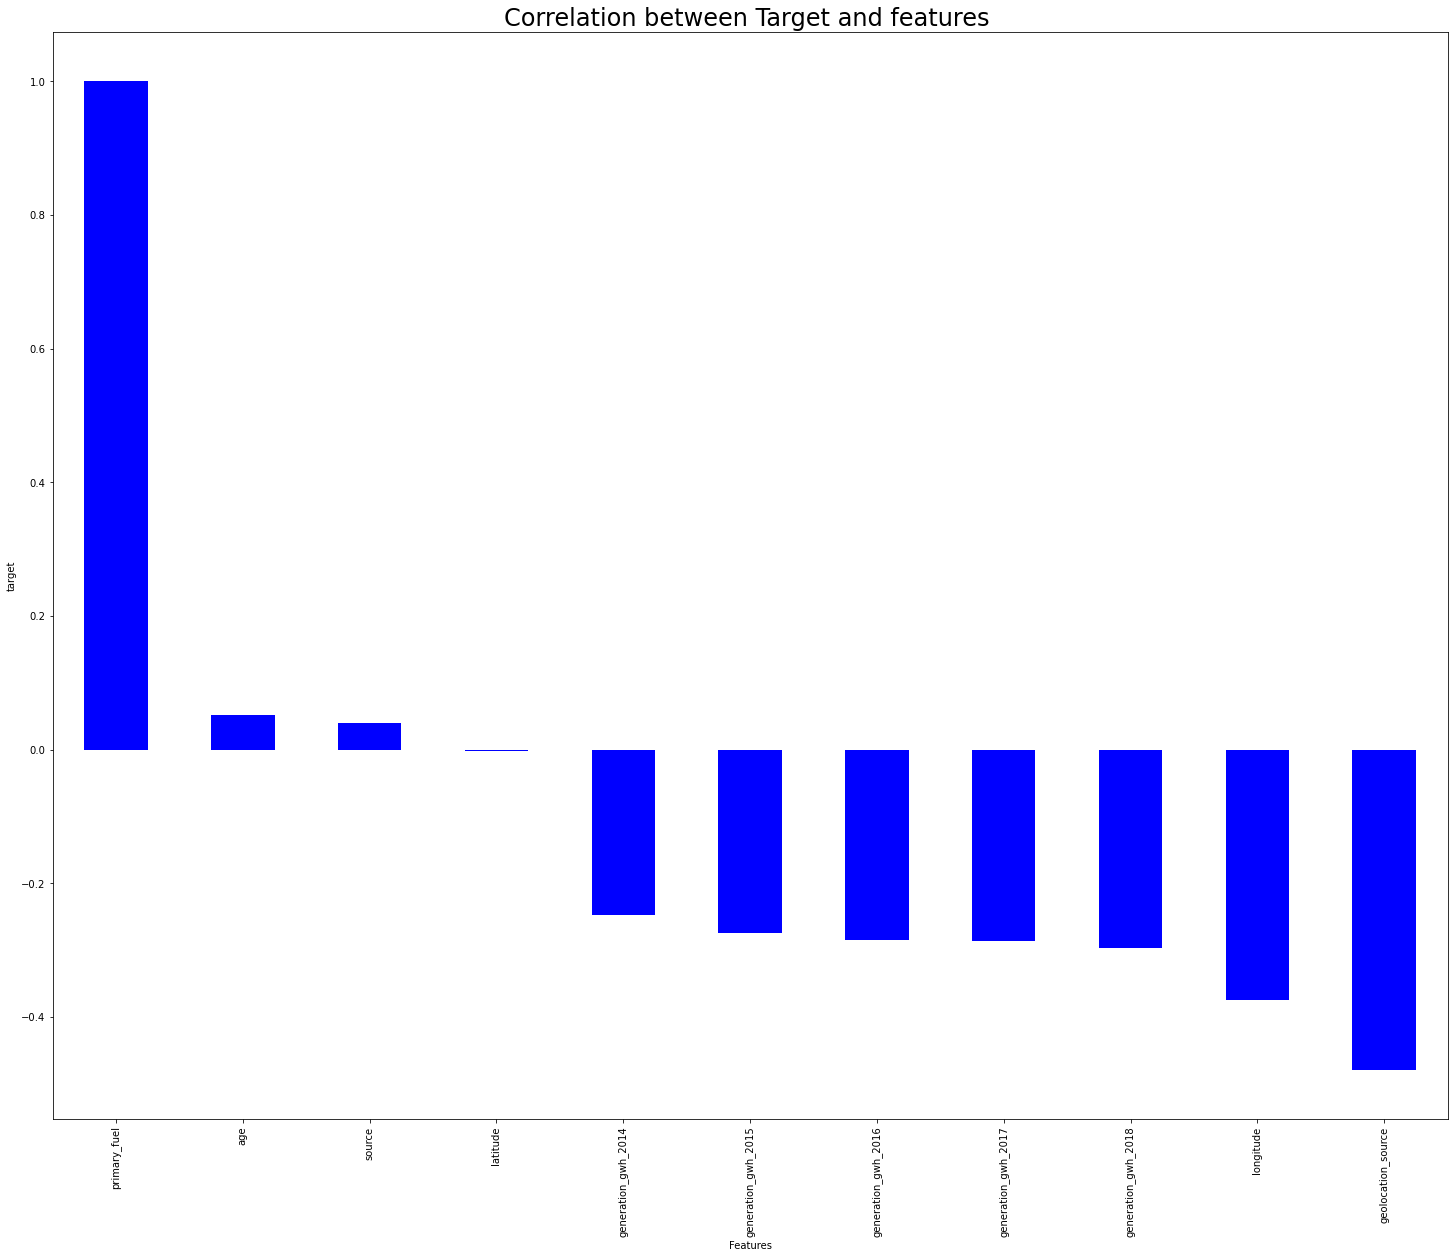

In [90]:
# generationg corraltion bar graph
plt.figure(figsize=(25,20))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=24)
plt.show()

# Splitting of Target and Features


In [91]:
x=df.drop("capacity_mw",axis=1)
y=df['capacity_mw']

# Removing the skewness


In [92]:
#checking the skewness
x.skew()

latitude              -0.111898
longitude              0.932815
primary_fuel           0.426394
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
age                    1.735483
dtype: float64

The following columns have skewness

longitude

generation_gwh_2014

generation_gwh_2015

generation_gwh_2016

generation_gwh_2017

generation_gwh_2018

age

In [93]:
skew_cols=['longitude','generation_gwh_2014','source','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

latitude              -0.111898
longitude             -0.001950
primary_fuel           0.426394
source                -0.188499
geolocation_source    -2.105485
generation_gwh_2014    0.229695
generation_gwh_2015    0.165128
generation_gwh_2016    0.146190
generation_gwh_2017    0.127716
generation_gwh_2018    0.136688
age                    0.021324
dtype: float64

Skewness removed



# Scaling of features


In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# MultiColinearity


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.081445,latitude
1,1.286551,longitude
2,1.634568,primary_fuel
3,1.292254,source
4,1.715189,geolocation_source
5,3.626712,generation_gwh_2014
6,6.234297,generation_gwh_2015
7,10.076741,generation_gwh_2016
8,9.817580,generation_gwh_2017
9,8.975423,generation_gwh_2018


Seems there are no Multicolinearity



# Spliting of features with best random state


as the target is contineous value so we will go for Regression Model



In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.880274934425138 at Random_state 78


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=7)

# Seaching for best model


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [99]:
def model_test(model,x,y):
    model.fit(x,y)
    pred=model.predict(x_test)
    print('R2_score:',r2_score(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [100]:
lr=LinearRegression()
model_test(lr,x_train,y_train)

R2_score: 0.5354117696043923
222.45050280564757
110298.1641137008


In [101]:
rfr=RandomForestRegressor()
model_test(rfr,x_train,y_train)

R2_score: 0.7866959504486717
105.09198047189209
50640.63943999518


In [102]:
dtr=DecisionTreeRegressor()
model_test(dtr,x_train,y_train)

R2_score: 0.6575353302791608
131.38716284987277
81304.73798668703


In [103]:
knn=KNN()
model_test(knn,x_train,y_train)

R2_score: 0.7218621616234431
115.94118244274809
66032.86724970273


In [104]:
svr=SVR()
model_test(svr,x_train,y_train)

R2_score: -0.12988071314635508
247.782462127815
268245.6424292151


In [105]:
SGD=SGDRegressor()
model_test(SGD,x_train,y_train)

R2_score: 0.5328716145741103
222.63217725847755
110901.22380844537


# Cross Validation Check

In [106]:
print('LR',cross_val_score(lr,x,y,cv=5).mean())
print('RFR',cross_val_score(rfr,x,y,cv=5).mean())
print('DTR',cross_val_score(dtr,x,y,cv=5).mean())
print('KNN',cross_val_score(knn,x,y,cv=5).mean())
print('SVR',cross_val_score(svr,x,y,cv=5).mean())
print('SGD',cross_val_score(SGD,x,y,cv=5).mean())

LR 0.5237560279679985
RFR 0.7690244169984068
DTR 0.5534727616949675
KNN 0.7212881890304501
SVR -0.1222644102203494
SGD 0.5263083710947642


After comparing the R2 Score and Cross validation score the best model found is RandomForestRegressor



# Hyper Parameter Tuning


In [107]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[3,4,5,10,20],
           'max_depth':[2,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
print('Best Parameters',GCV.best_params_)

Best Parameters {'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 10}


In [109]:
fin_model=RandomForestRegressor(criterion='mae',max_depth=6,max_features='log2',min_samples_split=4)
model_test(fin_model,x_train,y_train)

R2_score: 0.7930373780639399
97.23473160305343
49135.117392593296


After hyper tuning the model performance has increased 1%



# Saving the model


In [110]:
import joblib
joblib.dump(fin_model,'Global_Power_Plant_Reg.obj')

['Global_Power_Plant_Reg.obj']

# Second Part of Modeling cosidering 'Primary_fuel' as target


Splitiny of Target and Features



In [111]:
x=df.drop("primary_fuel",axis=1)
y=df['primary_fuel']

# Removing Skewness


In [112]:
#checking the skewness
x.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.932815
source                 1.771230
geolocation_source    -2.105485
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
age                    1.735483
dtype: float64

In [114]:
skew_cols=['longitude','source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
x[skew_cols]=scaler.fit_transform(x[skew_cols].values)
x.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude             -0.001950
source                -0.188499
geolocation_source    -2.105485
generation_gwh_2014    0.229695
generation_gwh_2015    0.165128
generation_gwh_2016    0.146190
generation_gwh_2017    0.127716
generation_gwh_2018    0.136688
age                    0.021324
dtype: float64

# Scaling of features


In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Multicolinearity


In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,2.085089,capacity_mw
1,1.069813,latitude
2,1.173204,longitude
3,1.236454,source
4,1.341003,geolocation_source
5,3.627906,generation_gwh_2014
6,6.252858,generation_gwh_2015
7,10.083315,generation_gwh_2016
8,9.931742,generation_gwh_2017
9,9.121051,generation_gwh_2018


# Checking Class Imbalance`


In [117]:
y.value_counts()

3    240
1    238
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

There is class imbalance, so we will balance it using SMOTE



In [118]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [119]:
y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

# Spliting of features for best random state


In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9149305555555556 at random_state 85


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=88)

In [123]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [124]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=26)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [125]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [126]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.7375
[[60  0  0  0  0  0  0  6]
 [ 5 23  6  4 12  2  0  5]
 [ 0  7 21 14  2 12  0  4]
 [ 0  8  5 33  5  4  0  7]
 [ 0  5  0  5 54  0  0  0]
 [ 3  0  0  0  0 58  0  3]
 [ 0  1  0  0  0  0 59  0]
 [ 0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        66
           1       0.52      0.40      0.46        57
           2       0.66      0.35      0.46        60
           3       0.58      0.53      0.55        62
           4       0.74      0.84      0.79        64
           5       0.76      0.91      0.83        64
           6       1.00      0.98      0.99        60
           7       0.65      0.98      0.78        47

    accuracy                           0.74       480
   macro avg       0.72      0.74      0.72       480
weighted avg       0.73      0.74      0.72       480

----------------------------------------
DecisionTreeClassifier()
0.8666666666666667
[[62  4  0  0  0  0

In [127]:
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.7317708333333334
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.884375
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.9302083333333334
----------------------------------------
Mean Accuracy of  GaussianNB()
0.6151041666666666
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.8614583333333332
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.28177083333333336
----------------------------------------


After comparing the result we found that the RandomForestClassifier is the best model for this dataset with 93% accuracy



# Hyper Parameter Tunining


In [128]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]}

In [129]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 4,
 'n_estimators': 100}

In [130]:
final_mod=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=4,n_estimators=100)
final_mod.fit(x,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

97.22222222222221


The accuracy level has increased a lot after Hypertuning at 97%



# Saving the Model


In [131]:
import joblib
joblib.dump(final_mod,'Global_Power_Plant_Class.obj')

['Global_Power_Plant_Class.obj']